In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [7]:
df_US_software_pivot = pd.read_csv("https://lukeb.co/software_csv", index_col='job_posted_month')

df_US_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [ ]:
df_US_pivot.merge(df_US_pivot, on='job_posted_month')

,Front-End Developer_x,Back-End Developer_x,Full-Stack Developer_x,UI/UX Designer_x,Front-End Developer_y,Back-End Developer_y,Full-Stack Developer_y,UI/UX Designer_y
job_posted_month,,,,,,,,
January,13619,9827,5108,4348,13619,9827,5108,4348
February,11456,9116,7298,4284,11456,9116,7298,4284
March,11102,8178,5814,4159,11102,8178,5814,4159
April,14037,9209,7232,4220,14037,9209,7232,4220
May,12126,8864,6718,4980,12126,8864,6718,4980
June,12003,8065,5902,4781,12003,8065,5902,4781
July,11914,8061,6839,4344,11914,8061,6839,4344
August,11571,8191,7413,4104,11571,8191,7413,4104
September,14016,8447,6139,4094,14016,8447,6139,4094


In [8]:
job_data = {
    'job_id': [1, 2, 3, 4, 5],
    'job_title': ['Data Scientist', 'Software Engineer', 'Product Manager', 'Marketing Director', 'HR Manager'],
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'job_location': ['Mountain View, CA', 'Redmond, WA', 'Cupertino, CA', 'Beaverton, OR', 'Seattle, WA']
}

company_data = {
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'industry': ['Technology', 'Technology', 'Technology', 'Apparel', 'Food & Beverage'],
    'company_size': ['100,000+', '100,000+', '100,000+', '75,000+', '346,000+']
}

df_jobs = pd.DataFrame(job_data)
df_companies = pd.DataFrame(company_data)

In [9]:
df_jobs

,job_id,job_title,company_name,job_location
0,1,Data Scientist,Google,"Mountain View, CA"
1,2,Software Engineer,Microsoft,"Redmond, WA"
2,3,Product Manager,Apple,"Cupertino, CA"
3,4,Marketing Director,Nike,"Beaverton, OR"
4,5,HR Manager,Starbucks,"Seattle, WA"


In [10]:
df_companies

,company_name,industry,company_size
0,Google,Technology,"100,000+"
1,Microsoft,Technology,"100,000+"
2,Apple,Technology,"100,000+"
3,Nike,Apparel,"75,000+"
4,Starbucks,Food & Beverage,"346,000+"


In [11]:
# Merge the two datasets in the 'job_id' column
df_jobs_company = df_jobs.merge(df_companies, on='company_name')

df_jobs_company

,job_id,job_title,company_name,job_location,industry,company_size
0,1,Data Scientist,Google,"Mountain View, CA",Technology,"100,000+"
1,2,Software Engineer,Microsoft,"Redmond, WA",Technology,"100,000+"
2,3,Product Manager,Apple,"Cupertino, CA",Technology,"100,000+"
3,4,Marketing Director,Nike,"Beaverton, OR",Apparel,"75,000+"
4,5,HR Manager,Starbucks,"Seattle, WA",Food & Beverage,"346,000+"


In [13]:
df_US = df[df['job_country'] == 'United States'].copy()
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')
df_US_pivot = df_US.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_US_pivot = df_US_pivot.reset_index()
df_US_pivot['job_posted_month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'], format='%B').dt.month
df_US_pivot = df_US_pivot.sort_values('job_posted_month_no')
df_US_pivot = df_US_pivot.set_index('job_posted_month')
df_US_pivot = df_US_pivot.drop(columns='job_posted_month_no')

df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [15]:
import random

# Set seed for reproducibility
random.seed(42)

# Define job titles
job_titles = ['Front-End Developer', 'Back-End Developer', 'Full-Stack Developer', 'UI/UX Designer']

# Define months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Define ranges for random data
ranges = {
    'Front-End Developer': (11000, 15000),
    'Back-End Developer': (8000, 10000),
    'Full-Stack Developer': (5000, 7500),
    'UI/UX Designer': (4000, 5000)
}

# Generate random data
data = {}
for job_title in job_titles:
    data[job_title] = [random.randint(ranges[job_title][0], ranges[job_title][1]) for _ in months]

# Create DataFrame
df_US_software_pivot = pd.DataFrame(data, index=months)
df_US_software_pivot.index.name = "job_posted_month"

df_US_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [16]:
df_US_software_pivot = pd.read_csv('https://lukeb.co/software_csv', index_col='job_posted_month')

df_US_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [17]:
df_US_merged = df_US_pivot.merge(df_US_software_pivot, on='job_posted_month')
df_US_merged

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114,13619,9827,5108,4348
February,447,24,6124,3060,4956,56,1258,878,1127,90,11456,9116,7298,4284
March,438,19,6218,3183,4779,59,1114,829,1150,115,11102,8178,5814,4159
April,565,40,6049,2801,4867,51,1025,781,991,112,14037,9209,7232,4220
May,279,20,4993,2976,4377,49,839,746,914,90,12126,8864,6718,4980
June,446,32,5683,2893,4645,48,1009,812,1033,93,12003,8065,5902,4781
July,581,39,5201,2570,4876,65,883,747,1095,153,11914,8061,6839,4344
August,903,39,6634,3269,6318,68,1186,903,1515,194,11571,8191,7413,4104
September,897,50,4639,3224,4568,113,805,775,1014,228,14016,8447,6139,4094


In [18]:
# Find top 5 job titles (columns) in df_US_merged
top_5 = df_US_merged.sum().sort_values(ascending=False).head(5).index
top_5 = top_5.tolist()

top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

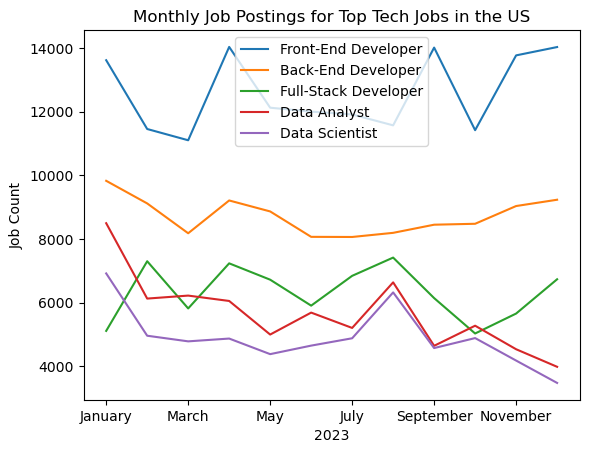

In [26]:
df_US_merged[top_5].plot(kind='line')
plt.title('Monthly Job Postings for Top Tech Jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()

In [27]:
## Filter for Data Analysts
df_DA = df[(df['job_title_short'] == 'Data Analyst')].copy()

## Create a column for month
df_DA['month'] = df_DA['job_posted_date'].dt.month

## Pivot table to count job postings by month
df_DA_pivot = df_DA.pivot_table(index='month', aggfunc='count')['job_title_short']

## Print the pivot table
df_DA_pivot

month
1     23585
2     16558
3     16243
4     15514
5     13423
6     16008
7     16095
8     18628
9     14969
10    16239
11    15230
12    13583
Name: job_title_short, dtype: int64

In [28]:
## Filter for Senior Data Analysts
df_SDA = df[(df['job_title_short'] == 'Senior Data Analyst')].copy()

## Create a column for month
df_SDA['month'] = df_SDA['job_posted_date'].dt.month

## Pivot table to count job postings by month
df_SDA_pivot = df_SDA.pivot_table(index='month', aggfunc='count')['job_title_short']

## Print the pivot table
df_SDA_pivot

month
1     3696
2     2713
3     2454
4     2351
5     1925
6     2319
7     2380
8     2951
9     2194
10    2317
11    2117
12    1799
Name: job_title_short, dtype: int64

In [29]:
## Merge the two pivot tables
merged_DA_pivot = pd.merge(df_DA_pivot, df_SDA_pivot, how='outer', left_index=True, right_index=True)
merged_DA_pivot.columns = ['DA count', 'SDA_count']
merged_DA_pivot

,DA count,SDA_count
month,,
1,23585,3696
2,16558,2713
3,16243,2454
4,15514,2351
5,13423,1925
6,16008,2319
7,16095,2380
8,18628,2951
9,14969,2194


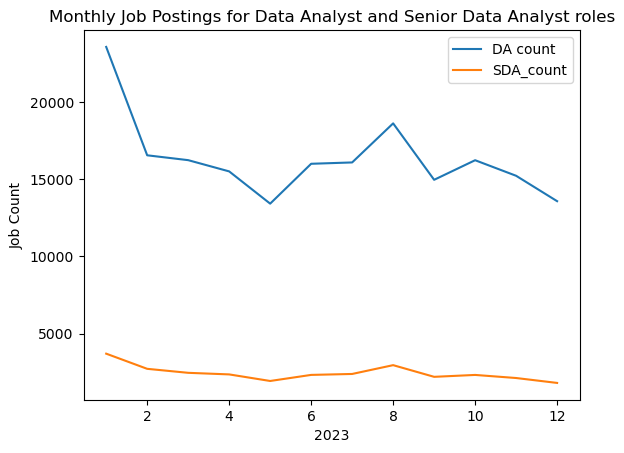

In [37]:
merged_DA_pivot.plot(kind='line')
plt.title('Monthly Job Postings for Data Analyst and Senior Data Analyst roles')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()

# Problems

In [26]:
# Merge US Jobs and Monthly Postings

df_US = df[df['job_country'] == 'United States'].copy()
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')
df_US_pivot = df_US.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_US_pivot = df_US_pivot.reset_index()
df_US_pivot['job_posted_month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'], format='%B').dt.month
df_US_pivot = df_US_pivot.sort_values('job_posted_month_no')
df_US_pivot = df_US_pivot.set_index('job_posted_month')
df_US_pivot = df_US_pivot.drop(columns='job_posted_month_no')

df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [30]:
df['job_posted_month'] = df['job_posted_date'].dt.strftime('%B')
monthly_postings = df[df['job_country'] == 'United States'].groupby('job_posted_month').size().to_frame(name='job_postings')

monthly_postings

,job_postings
job_posted_month,
April,17282
August,21029
December,13153
February,18020
January,22670
July,16210
June,16694
March,17904
May,15283


In [31]:
df_US_pivot.merge(monthly_postings, on='job_posted_month')

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,job_postings
job_posted_month,,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114,22670
February,447,24,6124,3060,4956,56,1258,878,1127,90,18020
March,438,19,6218,3183,4779,59,1114,829,1150,115,17904
April,565,40,6049,2801,4867,51,1025,781,991,112,17282
May,279,20,4993,2976,4377,49,839,746,914,90,15283
June,446,32,5683,2893,4645,48,1009,812,1033,93,16694
July,581,39,5201,2570,4876,65,883,747,1095,153,16210
August,903,39,6634,3269,6318,68,1186,903,1515,194,21029
September,897,50,4639,3224,4568,113,805,775,1014,228,16313


In [ ]:
# Merge Non-Remote Jobs and Salary
df_non_remote = (df[df['job_work_from_home'] == False]
                 .groupby('job_title_short')
                 .size()
                 .to_frame(name='job_postings')
                )

df_non_remote

,job_postings
job_title_short,
Business Analyst,46274
Cloud Engineer,11760
Data Analyst,182749
Data Engineer,165030
Data Scientist,157751
Machine Learning Engineer,12592
Senior Data Analyst,26872
Senior Data Engineer,38004
Senior Data Scientist,33158


In [51]:
df_non_remote_salary = df[df['job_work_from_home'] == False].groupby('job_title_short')['salary_year_avg'].median().to_frame(name='avg_salary')

df_non_remote_salary

,avg_salary
job_title_short,
Business Analyst,85000.0
Cloud Engineer,89100.0
Data Analyst,90000.0
Data Engineer,125000.0
Data Scientist,125000.0
Machine Learning Engineer,104668.0
Senior Data Analyst,111175.0
Senior Data Engineer,147500.0
Senior Data Scientist,152650.0


In [52]:
df_non_remote.merge(df_non_remote_salary, on='job_title_short')

,job_postings,avg_salary
job_title_short,,
Business Analyst,46274,85000.0
Cloud Engineer,11760,89100.0
Data Analyst,182749,90000.0
Data Engineer,165030,125000.0
Data Scientist,157751,125000.0
Machine Learning Engineer,12592,104668.0
Senior Data Analyst,26872,111175.0
Senior Data Engineer,38004,147500.0
Senior Data Scientist,33158,152650.0


In [70]:
# Merge Company Salary and Remote Count

company_salary = df.pivot_table(index='company_name', values='salary_year_avg', aggfunc='median')
company_salary = company_salary['salary_year_avg'].round(2).to_frame(name='avg_salary')

company_salary.head()

,avg_salary
company_name,
#twiceasnice Recruiting,65000.00
/dev/color,125000.00
0nward Select,92500.00
1 Point System,137290.48
1 Point System LLC.,170000.00


In [71]:
company_remote_jobs = df[df['job_work_from_home'] == True].groupby('company_name').size().to_frame(name='remote_jobs_postings')

company_remote_jobs

,remote_jobs_postings
company_name,
#EqualsTrue,4
#TeamGoHealth,1
#twiceasnice Recruiting,1
&Work,1
"(AEG) Application Engineering Group, Inc.",1
...,...
知名外企,1
精鼎医药,1
英屬維京群島商瑞嘉耐思科技有限公司台灣分公司,1


In [74]:
merged_pivot = pd.merge(company_salary, company_remote_jobs, how='outer', left_index=True, right_index=True)

merged_pivot.columns = ['avg_salary', 'remote_jobs_postings']

merged_pivot

,avg_salary,remote_jobs_postings
company_name,,
#EqualsTrue,NaN,4.0
#TeamGoHealth,NaN,1.0
#twiceasnice Recruiting,65000.0,1.0
&Work,NaN,1.0
"(AEG) Application Engineering Group, Inc.",NaN,1.0
...,...,...
知名外企,NaN,1.0
精鼎医药,NaN,1.0
英屬維京群島商瑞嘉耐思科技有限公司台灣分公司,NaN,1.0
